# Phân tích dữ liệu tên trẻ em Hoa Kỳ (1880–2010)
**Phần 13.3 – US Baby Names 1880–2010**
|

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Thiết lập hiển thị
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
plt.rcParams['figure.figsize'] = (10,5)



## Bước 1: Đọc dữ liệu mẫu năm 1880 và kiểm tra nhanh
Đọc file `yob1880.txt` để kiểm tra cấu trúc (cột: `name, sex, births`).
Tính tổng số trẻ sinh theo giới tính
Vì mỗi tệp chỉ chứa tên có ít nhất 5 trẻ sinh, ta có thể tính tổng số trẻ sinh của từng giới trong năm:


In [2]:
sample_path = 'yob1880.txt'
if not os.path.exists(sample_path):
    print(f'Không tìm thấy {sample_path}. Vui lòng kiểm tra thư mục dữ liệu.')
else:
    
    names1880 = pd.read_csv(sample_path, names=['name','sex','births'], encoding='utf-8')
    display(names1880.head(10))
    print('\nTổng số bản ghi:', len(names1880))
    print('\nTổng số trẻ theo giới:')
    print(names1880.groupby('sex')['births'].sum())

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288



Tổng số bản ghi: 2000

Tổng số trẻ theo giới:
sex
F     90993
M    110493
Name: births, dtype: int64


## Bước 2: Hợp nhất dữ liệu các năm 1880–2010
Vòng lặp sẽ đọc các file `yob1880.txt` tới `yob2010.txt`, thêm cột `year` và ghép lại.

In [3]:
pieces = []
missed = []
for year in range(1880, 2011):
    path = f'yob{year}.txt'
    if os.path.exists(path):
        frame = pd.read_csv(path, names=['name','sex','births'], encoding='utf-8')
        frame['year'] = year
        pieces.append(frame)
    else:
        missed.append(path)

if missed:
    print('Một vài file thiếu (không tồn tại):')
    for p in missed[:10]:
        print(' -', p)
    print('\nNếu các file bị thiếu, hãy đặt đầy đủ các file yob1880.txt..yob2010.txt vào datasets/babynames/')
else:
    names = pd.concat(pieces, ignore_index=True)
    print('Đã hợp nhất dữ liệu. Tổng số bản ghi sau khi ghép:', len(names))
    display(names.head())
    display(names.tail())

Đã hợp nhất dữ liệu. Tổng số bản ghi sau khi ghép: 1690784


,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


,name,sex,births,year
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010
1690783,Zzyzx,M,5,2010


## Bước 3: Tổng số trẻ sinh theo năm và giới tính
Sử dụng `pivot_table` để tính tổng số births theo `year` và `sex`.

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


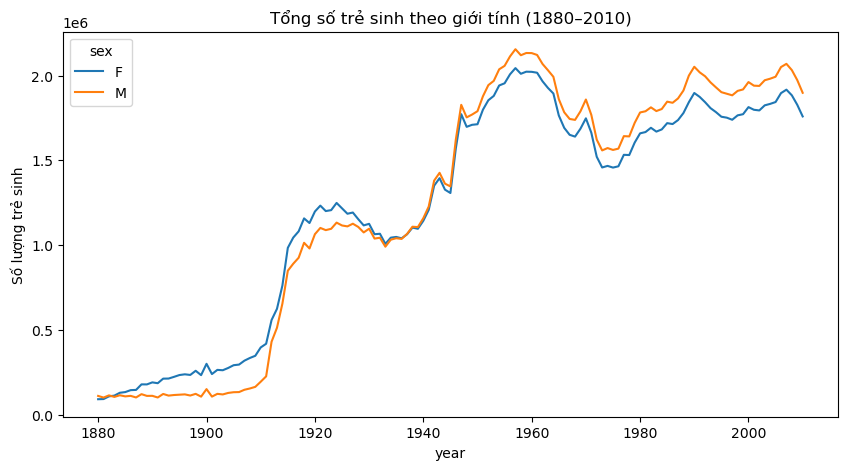

In [4]:

total_births = names.pivot_table('births', index='year', columns='sex', aggfunc='sum')
display(total_births.tail())
total_births.plot(title='Tổng số trẻ sinh theo giới tính (1880–2010)')
plt.ylabel('Số lượng trẻ sinh')
plt.show()


Diễn giải xu hướng tổng thể qua 5 giai đoạn
### Giai đoạn 1880–1915: Giai đoạn tăng trưởng ổn định ban đầu

Tổng số trẻ sinh tăng chậm nhưng đều đặn — phản ánh giai đoạn phát triển dân số tự nhiên, chưa có biến động lớn.

Xã hội Mỹ còn chịu ảnh hưởng văn hóa châu Âu truyền thống, các tên phổ biến (John, Mary, William, Anna...) thống trị.

Tên gọi trong giai đoạn này mang tính ổn định, kế thừa truyền thống gia đình.

➡️ Ý nghĩa: Đây là giai đoạn “đặt nền” cho xu hướng đặt tên kiểu cổ điển, ít biến động.
### Giai đoạn 1915–1945: Tăng nhanh trước và trong Thế chiến

Đường biểu diễn đi lên nhanh chóng → dân số và số sinh tăng mạnh.

Số liệu thể hiện “mini baby boom” trong những năm 1920–1930.

Hai đường (nam và nữ) vẫn song song, cho thấy tỷ lệ giới tính ổn định.

Việc đặt tên thời kỳ này vẫn chuộng tên truyền thống, nhưng bắt đầu xuất hiện các biến thể và ảnh hưởng từ văn hóa đại chúng (điện ảnh, radio).

➡️ Ý nghĩa: Đặt tên vẫn ổn định nhưng bắt đầu có sự phong phú hơn do mở rộng truyền thông và nhập cư.
### Giai đoạn 1946–1964: Thời kỳ “Baby Boom” sau Thế chiến II

Đây là đỉnh cao rõ rệt nhất trên biểu đồ – số lượng trẻ sinh bùng nổ chưa từng có trong lịch sử Mỹ.

Mức sinh đạt đỉnh vào cuối thập niên 1950, với hơn 4 triệu trẻ sơ sinh/năm.

Đường tăng của cả hai giới đều rất cao, thể hiện tăng trưởng dân số nhanh và sự ổn định xã hội sau chiến tranh.

Trong giai đoạn này, việc đặt tên trở nên đại trà, tập trung vào các tên mang ý nghĩa truyền thống, tôn giáo hoặc biểu tượng văn hóa (John, James, Mary, Linda, Susan,…).

➡️ Ý nghĩa:

Đỉnh “baby boom” không chỉ phản ánh dân số mà còn đánh dấu giai đoạn đặt tên đồng loạt, ít sáng tạo — nhiều trẻ được đặt cùng một nhóm tên → dẫn đến hiện tượng tên phổ biến chiếm tỷ lệ cao (sẽ được kiểm chứng ở phần sau).
### Giai đoạn 1965–1980: Suy giảm và chuyển đổi xã hội

Biểu đồ cho thấy số lượng sinh giảm mạnh và kéo dài.

Nguyên nhân: kiểm soát sinh sản, đô thị hóa, phong trào nữ quyền, chiến tranh Việt Nam, thay đổi giá trị gia đình.

Giai đoạn này tuy tổng số sinh giảm, nhưng cách đặt tên bắt đầu đa dạng hóa: nhiều tên mới, ít trùng lặp.

Đường biểu diễn ổn định thấp phản ánh một xã hội đang chuyển từ “truyền thống” sang “hiện đại”.

➡️ Ý nghĩa: Giai đoạn mở đầu cho xu hướng sáng tạo tên mới, độc đáo, phi truyền thống.
### Giai đoạn 1981–2010: Ổn định – Đa dạng hóa mạnh

Biểu đồ cho thấy số lượng sinh tăng nhẹ trở lại từ thập niên 1980 đến đầu 2000, rồi chững lại.

Khoảng cách giữa nam và nữ vẫn giữ ổn định — nam cao hơn nữ khoảng 5%.

Tuy tổng số sinh không tăng mạnh, nhưng cấu trúc tên thay đổi lớn:

Nhiều tên có nguồn gốc Latin, châu Á, Phi, hoặc biến thể hiện đại.

Xu hướng tên trung tính (Jordan, Taylor, Riley…) xuất hiện rõ.

Cha mẹ trẻ đặt tên theo thần tượng, phim, nhạc → tác động xã hội mạnh.

➡️ Ý nghĩa: Giai đoạn này mở ra thời kỳ đặt tên đa văn hóa, cá nhân hóa và phản ánh bản sắc riêng.

### Top 10 tên phổ biến mỗi thập kỹ 

##### Liệt kê bảng Top 10 tên phổ biến nhất theo từng thập kỷ 

In [5]:
names['decade'] = (names['year'] // 10) * 10

# Tổng số trẻ sinh theo thập kỷ, giới tính và tên
decade_grouped = names.groupby(['decade', 'sex', 'name'])['births'].sum().reset_index()

# Lấy top 10 tên phổ biến nhất trong từng thập kỷ và giới tính
top10_decade = (decade_grouped
                .groupby(['decade', 'sex'], group_keys=False)
                .apply(lambda x: x.nlargest(10, 'births'))
                .reset_index(drop=True))

display(top10_decade.head(20))


C:\Users\HP\AppData\Local\Temp\ipykernel_1408\525410107.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, 'births'))


,decade,sex,name,births
0,1880,F,Mary,91672
1,1880,F,Anna,38159
2,1880,F,Emma,25404
3,1880,F,Elizabeth,25007
4,1880,F,Margaret,21800
5,1880,F,Minnie,21724
6,1880,F,Ida,18283
7,1880,F,Bertha,18263
8,1880,F,Clara,17717
9,1880,F,Alice,17141


In [6]:
# Tạo cột 'decade' nếu chưa có
names['decade'] = (names['year'] // 10) * 10

# Tổng số trẻ sinh theo thập kỷ, giới tính và tên
decade_grouped = names.groupby(['decade', 'sex', 'name'])['births'].sum().reset_index()

# Lấy top 5 tên phổ biến nhất trong từng thập kỷ và giới tính
top5_decade = (decade_grouped
               .groupby(['decade', 'sex'], group_keys=False)
               .apply(lambda x: x.nlargest(5, 'births'))
               .reset_index(drop=True))

# Chọn một vài thập kỷ tiêu biểu để hiển thị
sample_decades = [1880,1900, 1950, 1980, 2000,2010]

# Lọc dữ liệu theo các thập kỷ đã chọn
top5_sample = top5_decade[top5_decade['decade'].isin(sample_decades)]

# Hiển thị bảng kết quả gọn gàng
top5_table = (top5_sample
              .groupby(['decade', 'sex'])['name']
              .apply(lambda x: ', '.join(x))
              .reset_index()
              .sort_values(['decade', 'sex']))

display(top5_table)


C:\Users\HP\AppData\Local\Temp\ipykernel_1408\1175831655.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(5, 'births'))


,decade,sex,name
0,1880,F,"Mary, Anna, Emma, Elizabeth, Margaret"
1,1880,M,"John, William, James, George, Charles"
2,1900,F,"Mary, Helen, Margaret, Anna, Ruth"
3,1900,M,"John, William, James, George, Charles"
4,1950,F,"Mary, Linda, Patricia, Susan, Deborah"
5,1950,M,"James, Michael, Robert, John, David"
6,1980,F,"Jessica, Jennifer, Amanda, Ashley, Sarah"
7,1980,M,"Michael, Christopher, Matthew, Joshua, David"
8,2000,F,"Emily, Madison, Emma, Olivia, Hannah"
9,2000,M,"Jacob, Michael, Joshua, Matthew, Daniel"


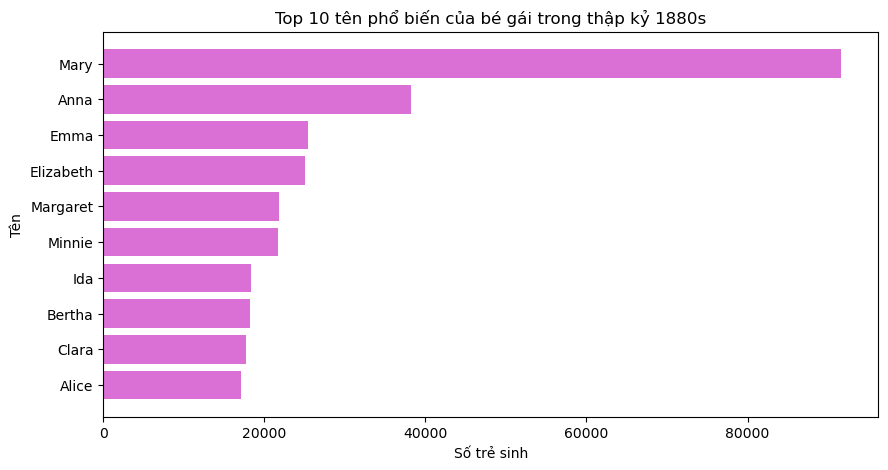

In [7]:
decade = 1880
subset = top10_decade[(top10_decade['decade'] == decade) & (top10_decade['sex'] == 'F')]
subset = subset.sort_values('births', ascending=True)

plt.barh(subset['name'], subset['births'], color='orchid')
plt.title(f'Top 10 tên phổ biến của bé gái trong thập kỷ {decade}s')
plt.xlabel('Số trẻ sinh')
plt.ylabel('Tên')
plt.show()


Trong thập kỷ 1880s, Mary là tên phổ biến nhất của bé gái, vượt xa phần còn lại.

Anna, Emma, Elizabeth cũng nằm trong nhóm đầu, thể hiện khuynh hướng đặt tên theo truyền thống Anh – Cơ Đốc giáo.

## Bước 4: Tính tỷ lệ của mỗi tên trong năm (cột `prop`)
Thêm cột `prop` = births / tổng births (theo từng nhóm year, sex).

In [8]:
def add_prop(group):
    births = group['births'].astype(float)
    group = group.copy()
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year','sex'], group_keys=False).apply(add_prop)
display(names.head())
display(names.tail()) 

C:\Users\HP\AppData\Local\Temp\ipykernel_1408\3841658958.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  names = names.groupby(['year','sex'], group_keys=False).apply(add_prop)


,name,sex,births,year,decade,prop
0,Mary,F,7065,1880,1880,0.077643
1,Anna,F,2604,1880,1880,0.028618
2,Emma,F,2003,1880,1880,0.022013
3,Elizabeth,F,1939,1880,1880,0.021309
4,Minnie,F,1746,1880,1880,0.019188


,name,sex,births,year,decade,prop
1690779,Zymaire,M,5,2010,2010,0.000003
1690780,Zyonne,M,5,2010,2010,0.000003
1690781,Zyquarius,M,5,2010,2010,0.000003
1690782,Zyran,M,5,2010,2010,0.000003
1690783,Zzyzx,M,5,2010,2010,0.000003


prop = số trẻ sinh với tên đó / tổng số trẻ sinh của giới tính đó trong năm.

Ví dụ: nếu 7.000 bé gái tên “Mary” trong tổng 90.000 bé gái năm 1880, thì prop ≈ 0.077.

In [9]:
s = names.groupby(['year','sex'])['prop'].sum()
print('Kiểm tra tổng prop (mỗi nhóm year,sex):')
display(s.head(6))

Kiểm tra tổng prop (mỗi nhóm year,sex):


year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
Name: prop, dtype: float64

## Bước 5: Lấy Top 1000 tên mỗi năm (theo mỗi giới)
Lọc ra tập top1000 để phân tích nhanh và trực quan hóa.

In [10]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False).head(1000)

grouped = names.groupby(['year','sex'])

top1000 = grouped.apply(get_top1000)
top1000.head()


C:\Users\HP\AppData\Local\Temp\ipykernel_1408\2828741946.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top1000 = grouped.apply(get_top1000)


name sex  births  year  decade      prop
year sex                                                 
1880 F   0       Mary   F    7065  1880    1880  0.077643
         1       Anna   F    2604  1880    1880  0.028618
         2       Emma   F    2003  1880    1880  0.022013
         3  Elizabeth   F    1939  1880    1880  0.021309
         4     Minnie   F    1746  1880    1880  0.019188

In [11]:
top1000 = top1000.reset_index(drop=True)
top1000.head()

,name,sex,births,year,decade,prop
0,Mary,F,7065,1880,1880,0.077643
1,Anna,F,2604,1880,1880,0.028618
2,Emma,F,2003,1880,1880,0.022013
3,Elizabeth,F,1939,1880,1880,0.021309
4,Minnie,F,1746,1880,1880,0.019188


## Bước 6: Xu hướng tên cụ thể
Lấy dữ liệu của vài tên nổi tiếng để xem xu hướng phổ biến theo thời gian:
Ví dụ: vẽ xu hướng cho các tên 'John', 'Harry', 'Mary', 'Marilyn'.

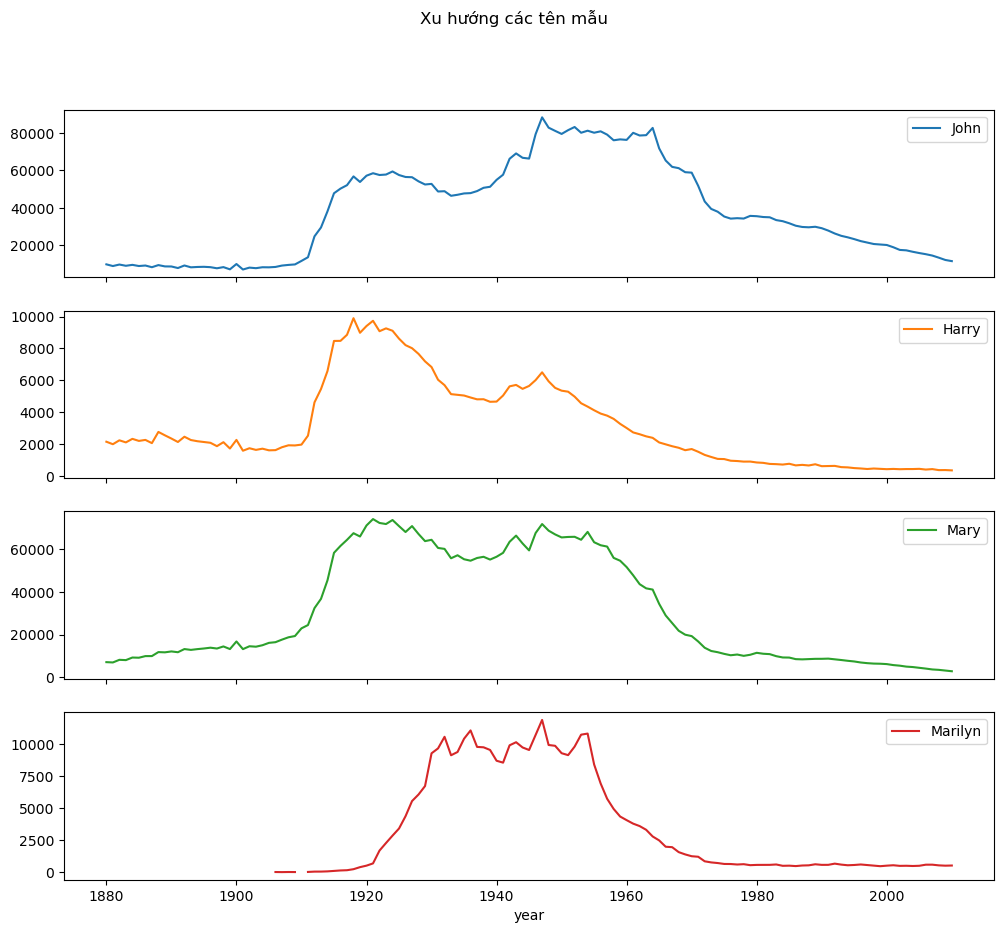

In [12]:
boys = top1000[top1000.sex == "M"]
girls = top1000[top1000.sex == "F"]
total_births_names = top1000.pivot_table('births', index='year', columns='name', aggfunc='sum')
subset = ['John','Harry','Mary','Marilyn']
exist = [n for n in subset if n in total_births_names.columns]
total_births_names[exist].plot(subplots=True, figsize=(12,10), title='Xu hướng các tên mẫu')
plt.show()


Biểu đồ cho thấy:
“Mary” cực kỳ phổ biến đầu thế kỷ 20 nhưng giảm mạnh sau 1960.
“John” giữ vị trí cao trong thời gian dài.
“Marilyn” tăng vọt giữa thế kỷ (do ảnh hưởng của Marilyn Monroe).

## Bước 7: Tỷ lệ tổng của Top 1000 tên theo thời gian
Xem Top1000 chiếm bao nhiêu phần trăm tổng số tên mỗi năm (tăng/giảm đa dạng).

sex,F,M
year,,
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003
2009,0.737290,0.845256
2010,0.736780,0.843156


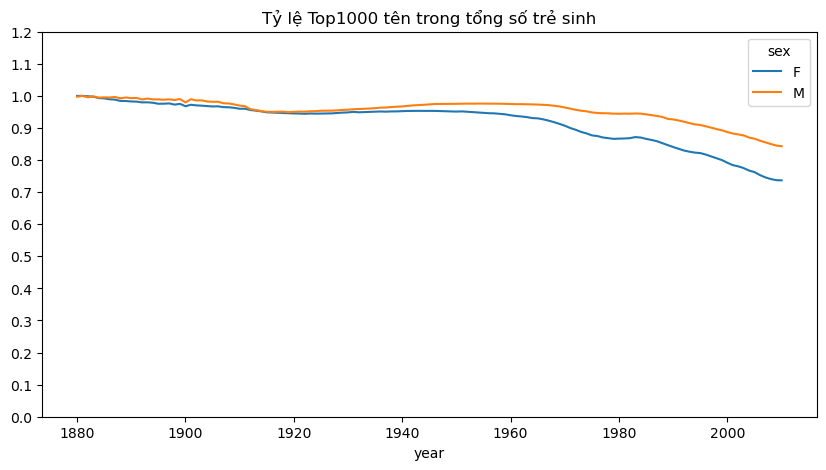

In [13]:

table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc='sum')
display(table.tail())
table.plot(title='Tỷ lệ Top1000 tên trong tổng số trẻ sinh',yticks=np.linspace(0, 1.2, 13))
plt.show()


##### Giai đoạn đầu (1880–1940):

Tỷ lệ gần 100% ở cả hai giới → nghĩa là hầu hết trẻ em sinh ra có tên nằm trong Top 1000.

Mức độ tập trung tên rất cao, ít tên mới được đặt.
→ Đặt tên truyền thống, ít biến động.

##### Sau 1950:

Tỷ lệ bắt đầu giảm dần còn khoảng 90–95%.

Cho thấy xu hướng đa dạng hóa bắt đầu xuất hiện – nhiều tên ít phổ biến hơn bắt đầu được dùng.

##### Từ 1970 trở đi:

Giảm rõ rệt, đặc biệt là bé gái → tỷ lệ còn khoảng 80% hoặc thấp hơn.

Đường “F” thấp hơn “M” thể hiện tên bé gái đa dạng hơn tên bé trai.
→ Văn hóa đặt tên ngày càng cởi mở, phản ánh ảnh hưởng của truyền thông, nhập cư và cá nhân hóa.

RSQ 3.1 Sự phổ biến của tên có khác nhau giữa bé trai và bé gái không (độ tập trung tên nữ có cao hơn)?

Quan sát biểu đồ:

Cả hai đường (nam & nữ) đều bắt đầu gần 1.0 (100%) vào năm 1880 — tức là hầu như mọi trẻ em đều có tên nằm trong Top 1000.

Từ sau năm 1940, đường của bé gái (F) bắt đầu thấp hơn bé trai (M).

Khoảng cách giữa hai đường tăng dần sau 1970, và duy trì cho đến 2010.

🔹 Giải thích ý nghĩa:

Bé gái có đường thấp hơn → tức là tên bé gái phân tán hơn, đa dạng hơn.

Bé trai có đường cao hơn → nghĩa là nhiều bé trai vẫn mang tên phổ biến, độ tập trung cao hơn.

Có sự khác biệt rõ ràng giữa hai giới.

Bé trai có độ tập trung tên cao hơn (ít tên phổ biến chiếm phần lớn dân số).

Bé gái có độ tập trung thấp hơn, tức là đa dạng tên cao hơn.

Biểu đồ “Tỷ lệ Top 1000 tên trong tổng số trẻ sinh” minh họa rõ ràng xu hướng này:
kể từ sau năm 1950, đường của bé gái (F) thấp hơn bé trai (M), và khoảng cách ngày càng tăng.

### 3.2 RSQ Những tên xuất hiện ngắn hạn (short-lived) khác gì so với tên phổ biến lâu dài (long-lived)?

In [14]:
duration = top1000.groupby('name')['year'].agg(['min', 'max'])
duration['lifespan'] = duration['max'] - duration['min']
short_names = duration[duration['lifespan'] < 10].index
long_names = duration[duration['lifespan'] > 50].index


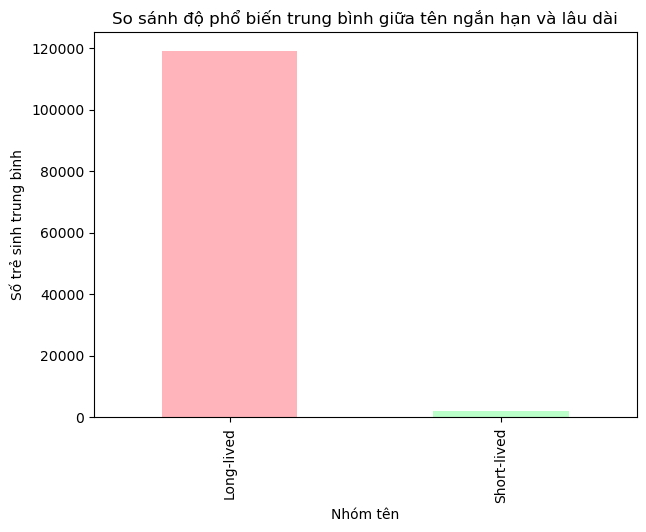

In [15]:
# Tính tổng số trẻ sinh theo nhóm short-lived và long-lived
grouped = names.groupby('name')['births'].sum().reset_index()

grouped['category'] = grouped['name'].apply(
    lambda x: 'Short-lived' if x in short_names else ('Long-lived' if x in long_names else 'Other')
)

summary = grouped[grouped['category'] != 'Other'].groupby('category')['births'].mean()

plt.figure(figsize=(7,5))
summary.plot(kind='bar', color=['#ffb3ba', '#baffc9'])
plt.title('So sánh độ phổ biến trung bình giữa tên ngắn hạn và lâu dài')
plt.ylabel('Số trẻ sinh trung bình')
plt.xlabel('Nhóm tên')
plt.show()


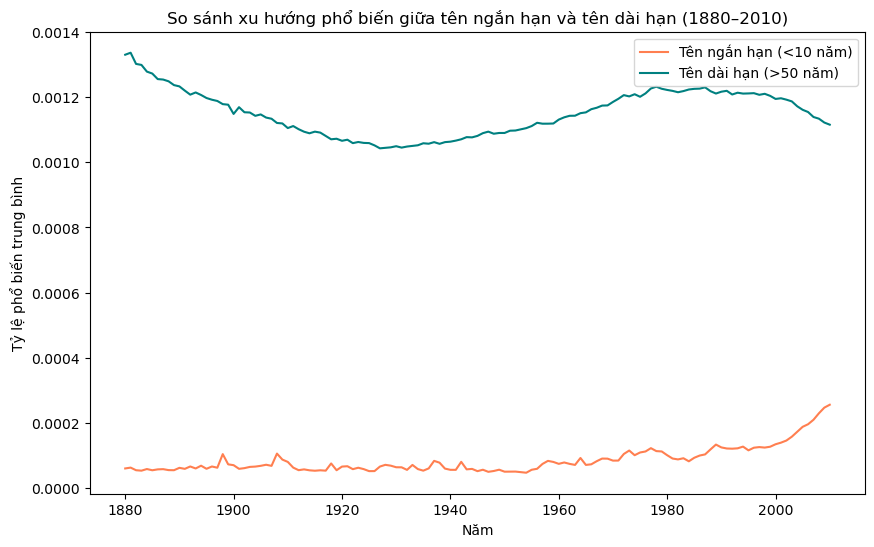

In [16]:
# Tính khoảng thời gian xuất hiện của từng tên
duration = top1000.groupby('name')['year'].agg(['min', 'max'])
duration['lifespan'] = duration['max'] - duration['min']

# Phân loại nhóm tên
short_names = duration[duration['lifespan'] < 10].index
long_names = duration[duration['lifespan'] > 50].index

# Tính trung bình tỷ lệ phổ biến (prop) theo năm cho hai nhóm
short_trend = top1000[top1000['name'].isin(short_names)].groupby('year')['prop'].mean()
long_trend = top1000[top1000['name'].isin(long_names)].groupby('year')['prop'].mean()

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
plt.plot(short_trend.index, short_trend.values, label='Tên ngắn hạn (<10 năm)', color='coral')
plt.plot(long_trend.index, long_trend.values, label='Tên dài hạn (>50 năm)', color='teal')
plt.title('So sánh xu hướng phổ biến giữa tên ngắn hạn và tên dài hạn (1880–2010)')
plt.xlabel('Năm')
plt.ylabel('Tỷ lệ phổ biến trung bình')
plt.legend()
plt.show()


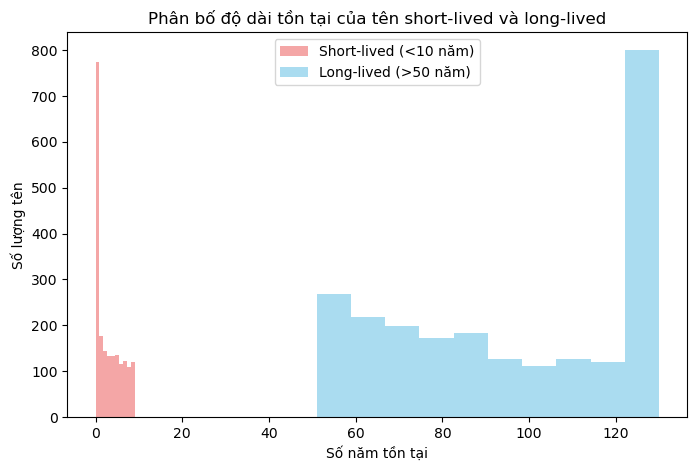

In [17]:
# --- Tính số năm tồn tại của mỗi tên ---
duration = top1000.groupby('name')['year'].agg(['min', 'max'])
duration['lifespan'] = duration['max'] - duration['min']

# --- Tạo hai nhóm: short-lived (<10 năm) và long-lived (>50 năm) ---
short_lifespan = duration[duration['lifespan'] < 10]
long_lifespan = duration[duration['lifespan'] > 50]

# --- Vẽ biểu đồ histogram để so sánh ---
plt.figure(figsize=(8,5))
plt.hist(short_lifespan['lifespan'], bins=10, alpha=0.7, label='Short-lived (<10 năm)', color='lightcoral')
plt.hist(long_lifespan['lifespan'], bins=10, alpha=0.7, label='Long-lived (>50 năm)', color='skyblue')
plt.title('Phân bố độ dài tồn tại của tên short-lived và long-lived')
plt.xlabel('Số năm tồn tại')
plt.ylabel('Số lượng tên')
plt.legend()
plt.show()


1. Tên short-lived (đỏ)

Số lượng nhiều, xuất hiện rồi nhanh chóng biến mất.

Thường gắn với trào lưu nhất thời (ví dụ: nhân vật phim, ca sĩ, xu hướng xã hội).

Biểu hiện tính “thời vụ” của văn hóa đại chúng.

Có thể đạt mức phổ biến cao trong vài năm, nhưng biến mất nhanh sau khi trào lưu qua đi.

🩷 Ví dụ: “Britney”, “Elvis”, “Chandler” (theo các thập kỷ văn hóa cụ thể).

🔹 2. Tên long-lived (xanh)

Số lượng ít hơn nhưng có độ bền vững cao.

Gắn liền với tên truyền thống, tôn giáo, văn hóa lâu đời (John, Mary, William, Elizabeth…).

Xuất hiện ổn định xuyên suốt nhiều thế hệ (trên 50 năm).

Thường mang ý nghĩa gia đình, lịch sử hoặc tôn giáo → được truyền qua các thế hệ.

Biểu đồ cho thấy phần lớn tên chỉ tồn tại trong thời gian ngắn (dưới 10 năm), phản ánh sự thay đổi nhanh chóng của xu hướng đặt tên theo thời kỳ.
Tuy nhiên, vẫn tồn tại một nhóm nhỏ tên bền vững qua hơn 50 năm, thể hiện tính truyền thống và ổn định trong văn hóa đặt tên của người Mỹ.

Xu hướng này cho thấy sự đan xen giữa tính thời đại và tính bền vững văn hóa trong việc đặt tên trẻ em.

In [18]:
df = boys[boys["year"] == 2010]
df 

,name,sex,births,year,decade,prop
260877,Jacob,M,21875,2010,2010,0.011523
260878,Ethan,M,17866,2010,2010,0.009411
260879,Michael,M,17133,2010,2010,0.009025
260880,Jayden,M,17030,2010,2010,0.008971
260881,William,M,16870,2010,2010,0.008887
...,...,...,...,...,...,...
261872,Jaydan,M,194,2010,2010,0.000102
261873,Camilo,M,194,2010,2010,0.000102
261874,Bailey,M,194,2010,2010,0.000102
261875,Destin,M,194,2010,2010,0.000102


In [19]:
prop_cumsum = df["prop"].sort_values(ascending=False).cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [20]:
prop_cumsum.searchsorted(0.5)

np.int64(116)

In [21]:
df = boys[boys.year == 1900]
in1900 = df.sort_values("prop", ascending=False).prop.cumsum()
in1900.searchsorted(0.5) + 1

np.int64(25)

Vì mảng được lập chỉ mục từ 0, nên việc cộng 1 vào kết quả này sẽ cho bạn kết quả là 117. Ngược lại, vào năm 1900, con số này nhỏ hơn nhiều:

## Bước 9: Đo độ đa dạng - số lượng tên chiếm 50% tổng
Tính số tên cần thiết để đạt 50% tổng births mỗi năm và vẽ biểu đồ.

C:\Users\HP\AppData\Local\Temp\ipykernel_1408\2222545723.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  diversity = names.groupby(['year','sex']).apply(get_quantile_count).unstack('sex')


sex,F,M
year,,
2006,209,99
2007,223,103
2008,234,109
2009,241,114
2010,246,117


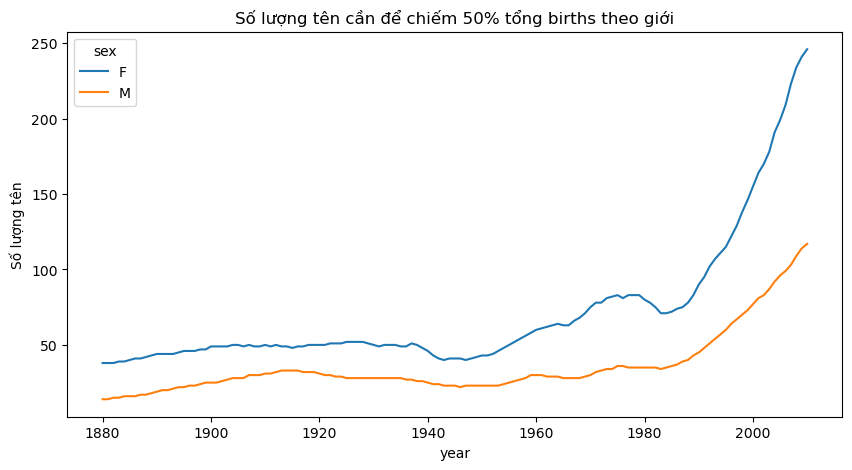

In [22]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1

diversity = names.groupby(['year','sex']).apply(get_quantile_count).unstack('sex')
display(diversity.tail())
diversity.plot(title='Số lượng tên cần để chiếm 50% tổng births theo giới')
plt.ylabel('Số lượng tên')
plt.show()

Giai đoạn đầu (1880–1930)

Biểu đồ cho thấy cả hai đường đều thấp – chỉ khoảng ~100–200 tên đã chiếm 50% tổng số sinh.

Điều này có nghĩa là phần lớn trẻ em được đặt trùng trong một nhóm nhỏ các tên phổ biến.
→ Mức độ đa dạng tên rất thấp.

🟩 Giải thích:
Xã hội Mỹ thời kỳ này còn truyền thống, đồng nhất văn hóa → cha mẹ chọn tên phổ biến (Mary, John, Anna, William,…).

🔹 Giai đoạn 1940–1970

Số lượng tên tăng dần: cần khoảng 250–300 tên để chiếm 50% dân số sinh.

Độ đa dạng bắt đầu tăng nhẹ.

🟩 Giải thích:
Sau chiến tranh, dân số tăng mạnh, nhập cư từ nhiều quốc gia → sự đa dạng văn hóa tăng.
Ngoài ra, sự lan rộng của truyền thông (phim ảnh, âm nhạc) làm xuất hiện các tên mới.

🔹 Giai đoạn 1970–2010

Độ đa dạng tăng mạnh, đặc biệt là ở giới nữ:

Đường F (Female) cao hơn rõ → cần hơn 400–500 tên để bao phủ 50% số sinh.

Nam cũng tăng, nhưng chậm hơn (~350–400 tên).

Cho thấy sự mở rộng và đa dạng hóa mạnh mẽ trong việc đặt tên.

## Bước 10 Phân tích sâu mở rộng


Lấy chữ cái cuối của mỗi tên và tạo bảng tổng hợp số trẻ sinh theo chữ cái cuối, giới tính và năm để phân tích xu hướng thay đổi qua thời gian.

In [23]:
def get_last_letter(x):
    return x[-1]
last_letters = names["name"].map(get_last_letter)
last_letters.name = "last_letter"
table = names.pivot_table("births", index=last_letters,
columns=["sex", "year"], aggfunc=sum)


C:\Users\HP\AppData\Local\Temp\ipykernel_1408\2145031199.py:5: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  table = names.pivot_table("births", index=last_letters,


Chọn ba năm đại diện cho toàn bộ lịch sử và in ra một vài hàng đầu tiên:

In [24]:
subtable = table.reindex(columns=[1910, 1960, 2010], level="year")
subtable.head()

sex                 F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0

Tiếp theo, chuẩn hóa bảng theo tổng số ca sinh để tính toán một bảng mới chứa
tỷ lệ tổng số ca sinh cho mỗi giới tính kết thúc trong mỗi chữ cái:

In [25]:
subtable.sum()

sex  year
F    1910     396416.0
     1960    2022062.0
     2010    1759010.0
M    1910     194198.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [26]:
letter_prop = subtable / subtable.sum()
letter_prop

sex                 F                             M                    
year             1910      1960      2010      1910      1960      2010
last_letter                                                            
a            0.273390  0.341853  0.381240  0.005031  0.002440  0.014980
b                 NaN  0.000343  0.000256  0.002116  0.001834  0.020470
c            0.000013  0.000024  0.000538  0.002482  0.007257  0.012181
d            0.017028  0.001844  0.001482  0.113858  0.122908  0.023387
e            0.336941  0.215133  0.178415  0.147556  0.083853  0.067959
f                 NaN  0.000010  0.000055  0.000783  0.004325  0.001188
g            0.000144  0.000157  0.000374  0.002250  0.009488  0.001404
h            0.051529  0.036224  0.075852  0.045562  0.037907  0.051670
i            0.001526  0.039965  0.031734  0.000844  0.000603  0.022628
j                 NaN       NaN  0.000090       NaN       NaN  0.000769
k            0.000121  0.000156  0.000356  0.036581  0.049384  0.018541
l            0.043189  0.033867  0.026356  0.065016  0.104904  0.070367
m            0.001201  0.008613  0.002588  0.058044  0.033827  0.024657
n            0.079240  0.130687  0.140210  0.143415  0.152522  0.362771
o            0.001660  0.002439  0.001243  0.017065  0.012829  0.042681
p            0.000018  0.000023  0.000020  0.003172  0.005675  0.001269
q                 NaN       NaN  0.000030       NaN       NaN  0.000180
r            0.013390  0.006764  0.018025  0.064481  0.031034  0.087477
s            0.039042  0.012764  0.013332  0.130815  0.102730  0.065145
t            0.027438  0.015201  0.007830  0.072879  0.065655  0.022861
u            0.000684  0.000574  0.000417  0.000124  0.000057  0.001221
v                 NaN  0.000060  0.000117  0.000113  0.000037  0.001434
w            0.000020  0.000031  0.001182  0.006329  0.007711  0.016148
x            0.000015  0.000037  0.000727  0.003965  0.001851  0.008614
y            0.110972  0.152569  0.116828  0.077349  0.160987  0.058168
z            0.002439  0.000659  0.000704  0.000170  0.000184  0.001831

Sau khi đã có tỷ lệ các chữ cái cuối, ta sẽ tạo biểu đồ cột cho từng giới tính, thể hiện sự thay đổi tỷ lệ các chữ cái cuối qua các năm.

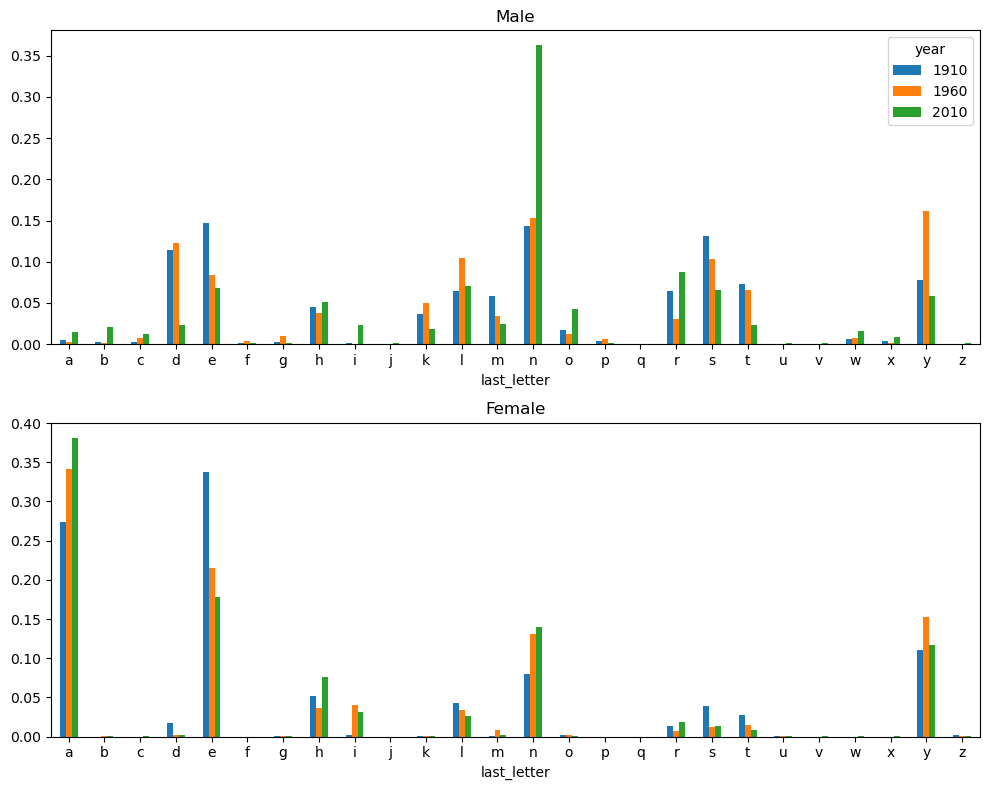

In [27]:

# Vẽ 2 biểu đồ cột (Male / Female) chỉ cho 3 năm này
import matplotlib.pyplot as plt
plt.close('all')  # dọn vùng vẽ cũ
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Lưu ý: letter_prop["M"] và letter_prop["F"] là DataFrame có các cột là [1910,1960,2010]
letter_prop["M"].plot(kind="bar", rot=0, ax=axes[0], title="Male")
letter_prop["F"].plot(kind="bar", rot=0, ax=axes[1], title="Female", legend=False)

plt.tight_layout()
plt.show()


Tên con trai kết thúc bằng n đã có sự tăng trưởng đáng kể kể từ những năm 1960. Quay lại bảng đầy đủ đã tạo trước đó, tôi lại chuẩn hóa theo năm và
giới tính, rồi chọn một tập hợp con các chữ cái cho tên con trai, cuối cùng chuyển vị để biến mỗi
cột thành một chuỗi thời gian:


In [28]:
letter_prop = table / table.sum()
dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T
dny_ts.head()


last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


Với DataFrame chuỗi thời gian này,có thể vẽ lại biểu đồ xu hướng theo thời gian
một lần nữa bằng phương pháp vẽ biểu đồ

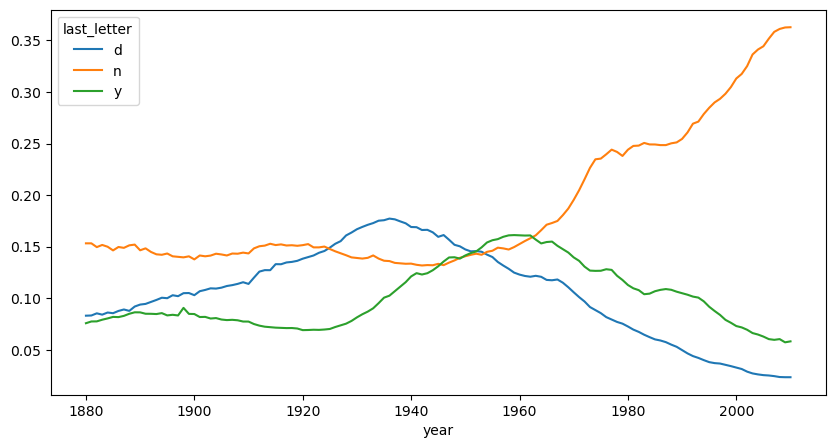

In [29]:

import matplotlib.pyplot as plt

fig = dny_ts.plot()  
plt.show()           


## Bước 11: Boy names that became girl names (and vice versa)

Một xu hướng thú vị khác là xem xét những cái tên phổ biến hơn với một giới tính
trước đó trong mẫu nhưng đã trở nên được ưa chuộng hơn khi dùng làm tên cho giới tính còn lại
theo thời gian. Một ví dụ là tên Lesley hoặc Leslie. Quay lại với DataFrame top1000, tôi tính toán một danh sách các tên xuất hiện trong tập dữ liệu bắt đầu bằng "Lesl":

In [30]:
all_names = pd.Series(top1000["name"].unique())
lesley_like = all_names[all_names.str.contains("Lesl")]
lesley_like

645     Leslie
2325    Lesley
4241    Leslee
4706     Lesli
6082     Lesly
dtype: object

Từ đó, chúng ta có thể lọc xuống chỉ còn những tên đó và cộng các ca sinh được nhóm theo tên
để xem tần suất tương đối:

In [31]:
filtered = top1000[top1000["name"].isin(lesley_like)]
filtered.groupby("name")["births"].sum()

name
Leslee       916
Lesley     35010
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

Tiếp theo, chúng ta hãy tổng hợp theo giới tính và năm, và chuẩn hóa trong năm:

In [32]:
table = filtered.pivot_table("births", index="year",columns="sex", aggfunc="sum")
table = table.div(table.sum(axis="columns"), axis="index")
table.tail()

sex,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


Cuối cùng, bây giờ có thể tạo ra một biểu đồ phân tích sự cố theo giới tính theo thời gian

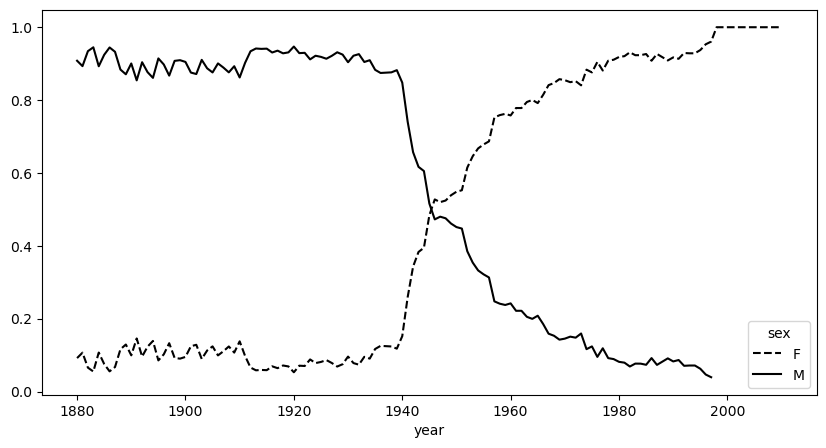

In [33]:

import matplotlib.pyplot as plt

fig = table.plot(style={"M": "k-", "F": "k--"})
plt.show()          


# 2.2


In [34]:
name_ratio = (names.pivot_table('births', index='name', columns='sex', aggfunc='sum')
              .fillna(0))
name_ratio['ratio'] = name_ratio.min(axis=1) / name_ratio.max(axis=1)
neutral_names = name_ratio[name_ratio['ratio'] > 0.3]


Top 10 tên trung tính phổ biến (1880-2010)

In [35]:
def get_neutral_names(data, ratio_threshold=0.3, top_n=20):
    """
    Hàm xác định và in ra danh sách các tên trung tính.
    
    Tham số:
    - data: DataFrame gốc (tên, giới, số sinh)
    - ratio_threshold: ngưỡng tỷ lệ cân bằng giới (0.3 = ít nhất 30% cho mỗi giới)
    - top_n: số lượng tên trung tính phổ biến nhất cần hiển thị
    """
    
    name_ratio = (data.pivot_table('births', index='name', columns='sex', aggfunc='sum')
                  .fillna(0))
    
    name_ratio['ratio'] = name_ratio.min(axis=1) / name_ratio.max(axis=1)
    neutral = name_ratio[name_ratio['ratio'] > ratio_threshold].copy()
    neutral['total_births'] = neutral['F'] + neutral['M']
    neutral_sorted = neutral.sort_values('total_births', ascending=False)
    
    print(f"Top {top_n} tên trung tính phổ biến nhất (tỷ lệ > {ratio_threshold}):\n")
    display(neutral_sorted.head(top_n))
    
    return neutral_sorted

# Gọi hàm
neutral_names = get_neutral_names(names, ratio_threshold=0.3, top_n=20)


Top 20 tên trung tính phổ biến nhất (tỷ lệ > 0.3):



sex,F,M,ratio,total_births
name,,,,
Willie,146103.0,446185.0,0.327449,592288.0
Jordan,121274.0,322499.0,0.376045,443773.0
Taylor,290060.0,104639.0,0.360750,394699.0
Leslie,259392.0,112294.0,0.432912,371686.0
Jamie,263130.0,83287.0,0.316524,346417.0
Jessie,163739.0,108007.0,0.659629,271746.0
Angel,86405.0,182416.0,0.473670,268821.0
Marion,187263.0,71335.0,0.380935,258598.0
Casey,73493.0,106278.0,0.691517,179771.0


Top 10 tên trung tính phổ biến nhất (tỷ lệ > 0.3):



sex,F,M,ratio,total_births
name,,,,
Willie,146103.0,446185.0,0.327449,592288.0
Jordan,121274.0,322499.0,0.376045,443773.0
Taylor,290060.0,104639.0,0.360750,394699.0
Leslie,259392.0,112294.0,0.432912,371686.0
Jamie,263130.0,83287.0,0.316524,346417.0
Jessie,163739.0,108007.0,0.659629,271746.0
Angel,86405.0,182416.0,0.473670,268821.0
Marion,187263.0,71335.0,0.380935,258598.0
Casey,73493.0,106278.0,0.691517,179771.0


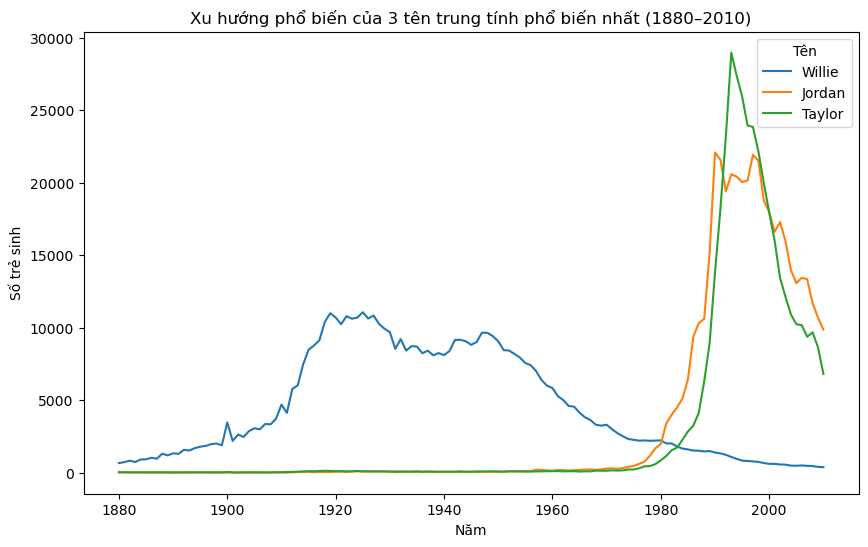

In [36]:
# --- Xác định top 3 tên trung tính phổ biến nhất ---
neutral_names = get_neutral_names(names, ratio_threshold=0.3, top_n=10)
top3 = neutral_names.head(3).index.tolist()   # Lấy 3 tên đầu tiên

# --- Tạo bảng dữ liệu theo năm cho 3 tên đó ---
subset = names[names['name'].isin(top3)]

# --- Tính tổng số sinh theo giới tính, năm và tên ---
pivot = subset.pivot_table('births', index='year', columns=['name','sex'], aggfunc='sum').fillna(0)

# --- Vẽ biểu đồ xu hướng cho từng tên ---
plt.figure(figsize=(10,6))
for name in top3:
    total = pivot[name].sum(axis=1)
    plt.plot(total.index, total.values, label=name)

plt.title('Xu hướng phổ biến của 3 tên trung tính phổ biến nhất (1880–2010)')
plt.xlabel('Năm')
plt.ylabel('Số trẻ sinh')
plt.legend(title='Tên')
plt.show()


1️⃣ Giai đoạn đầu (1880–1950): Willie thống trị, Jordan & Taylor chưa phổ biến

Willie là tên xuất hiện sớm nhất và rất phổ biến ở giai đoạn 1900–1940, đạt đỉnh khoảng 10.000–12.000 trẻ/năm.

Tuy nhiên, đa phần là bé trai, chỉ một phần nhỏ dùng cho bé gái.

Jordan và Taylor gần như chưa được sử dụng trong thời kỳ này.

🟢 Nhận xét:
→ Giai đoạn này, xã hội Mỹ vẫn phân biệt giới tính rõ ràng trong đặt tên,
→ Các tên trung tính hầu như chưa xuất hiện nhiều.
→ Willie là một trong số ít tên có thể dùng cho cả hai giới, nhưng chủ yếu vẫn thiên về nam.

🔹 2️⃣ Giai đoạn 1970–2000: Jordan và Taylor tăng vọt

Từ thập niên 1970, cả Jordan và Taylor bắt đầu tăng nhanh.

Jordan đạt đỉnh khoảng 1990s, trùng với thời kỳ huyền thoại bóng rổ Michael Jordan → cho thấy ảnh hưởng văn hóa đại chúng.

Taylor cũng tăng mạnh vào cuối 1980–1990, phổ biến cho cả nam lẫn nữ (đặc biệt nhờ các nhân vật văn hóa như Taylor Dayne, Taylor Hanson, Taylor Swift sau này).

Trong khi đó, Willie dần giảm và mất vị thế.

🟣 Nhận xét:
→ Xu hướng tăng mạnh của Jordan và Taylor phản ánh sự mở rộng và chấp nhận của tên phi giới tính (unisex).
→ Văn hóa Mỹ chuyển từ “tên rõ giới” sang “tên trung tính” để thể hiện tự do, cá nhân hóa và bình đẳng giới.

🔹 3️⃣ Giai đoạn 2000–2010: Giảm nhẹ nhưng vẫn duy trì

Sau năm 2000, cả Jordan và Taylor giảm nhẹ nhưng duy trì độ phổ biến cao hơn hẳn so với các tên trung tính cũ như Willie.

Điều này chứng tỏ rằng xu hướng tên trung tính đã trở thành một phần bền vững trong văn hóa đặt tên của người Mỹ.

### 4 phân tích dự đoán 

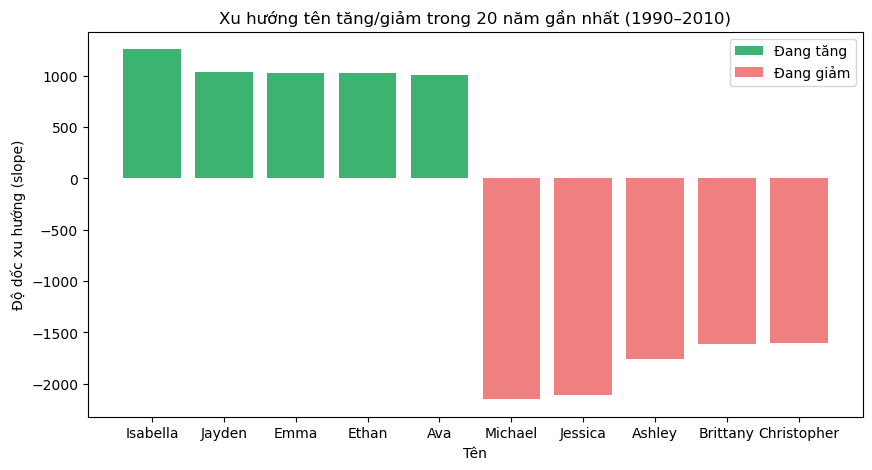

In [37]:
# --- Lấy dữ liệu trong 20 năm gần nhất (1990–2010) ---
recent_years = names[names['year'] >= 1990]

# --- Tính tổng số sinh theo năm cho từng tên ---
trend = (recent_years.groupby(['year', 'name'])['births']
         .sum()
         .reset_index())

# --- Tính hệ số tương quan tuyến tính (slope) của mỗi tên trong 20 năm gần nhất ---
from scipy.stats import linregress

slopes = []
for name, group in trend.groupby('name'):
    if len(group) >= 5:  # chỉ xét tên có ít nhất 5 năm dữ liệu
        slope, _, _, _, _ = linregress(group['year'], group['births'])
        slopes.append((name, slope))

trend_df = pd.DataFrame(slopes, columns=['name', 'slope'])

# --- Chọn top 5 tên đang tăng nhanh và giảm nhanh ---
top_rising = trend_df.sort_values('slope', ascending=False).head(5)
top_falling = trend_df.sort_values('slope').head(5)

# --- Vẽ biểu đồ xu hướng tăng và giảm ---
plt.figure(figsize=(10,5))

plt.bar(top_rising['name'], top_rising['slope'], color='mediumseagreen', label='Đang tăng')
plt.bar(top_falling['name'], top_falling['slope'], color='lightcoral', label='Đang giảm')
plt.title('Xu hướng tên tăng/giảm trong 20 năm gần nhất (1990–2010)')
plt.ylabel('Độ dốc xu hướng (slope)')
plt.xlabel('Tên')
plt.legend()
plt.show()


Mỗi cột biểu diễn mức thay đổi trung bình mỗi năm (slope) của một tên trong 20 năm gần nhất.

Cột xanh lá: tên đang tăng nhanh → có khả năng tiếp tục phổ biến trong tương lai.

Cột đỏ: tên đang giảm mạnh → có nguy cơ biến mất.
quan sát:
Tên đang tăng:Các tên như Aiden, Isabella, Jayden… có slope dương mạnh → phổ biến trở lại trong thế hệ mới.
Tên đang giảm:Các tên như Michael, Jessica, Amanda… có slope âm → từng nổi tiếng ở 1980–1990 nhưng nay giảm dần.

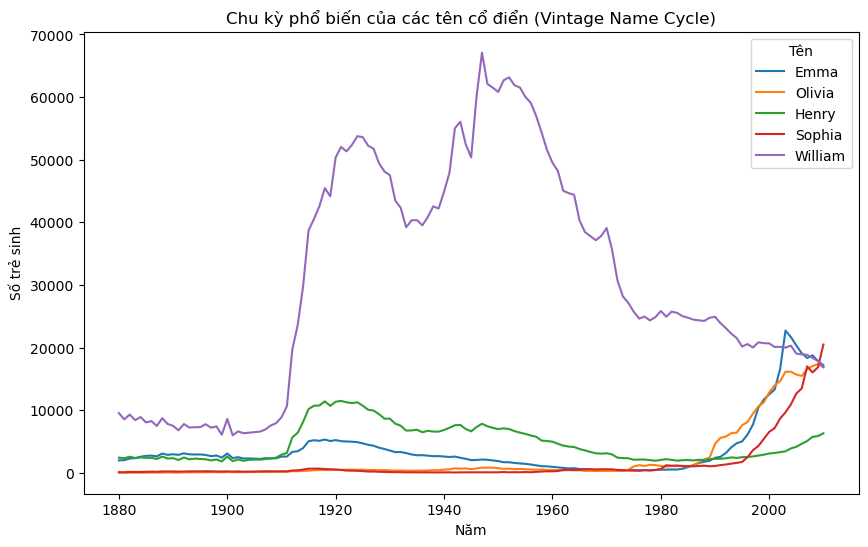

In [38]:
# --- Chọn một vài tên cổ điển thường có chu kỳ tái phổ biến ---
vintage_names = ['Emma', 'Olivia', 'Henry', 'Sophia', 'William']

# --- Lọc dữ liệu ---
subset = names[names['name'].isin(vintage_names)]

# --- Vẽ biểu đồ xu hướng phổ biến theo thời gian ---
plt.figure(figsize=(10,6))
for name in vintage_names:
    total = subset[subset['name'] == name].groupby('year')['births'].sum()
    plt.plot(total.index, total.values, label=name)

plt.title('Chu kỳ phổ biến của các tên cổ điển (Vintage Name Cycle)')
plt.xlabel('Năm')
plt.ylabel('Số trẻ sinh')
plt.legend(title='Tên')
plt.show()


Biểu đồ cho thấy nhiều tên truyền thống (Emma, William, Henry) từng đạt đỉnh ở đầu thế kỷ XX,
→ giảm dần giữa thế kỷ,
→ rồi tăng trở lại mạnh sau 1990.

Đây là bằng chứng cho hiện tượng “vintage revival” (chu kỳ tái sinh tên cổ).


Có mối quan hệ rõ ràng giữa chu kỳ văn hóa và độ phổ biến tên.

Các tên cổ điển thường quay lại phổ biến sau 50–80 năm, phản ánh sự hoài niệm văn hóa (nostalgia)
và xu hướng đặt tên mang giá trị truyền thống pha hiện đại.

# 4(1)

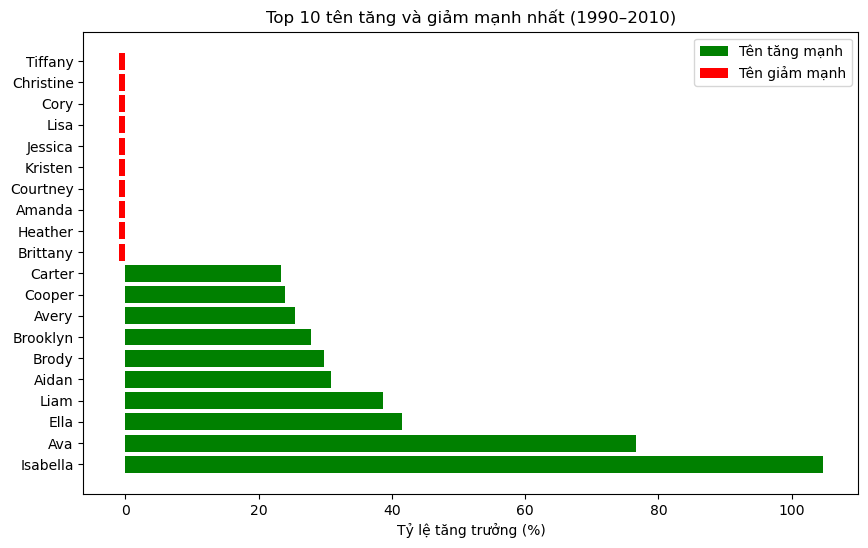

In [39]:
# Lấy trung bình số sinh của 20 năm gần nhất (1990–2010)
recent = top1000[top1000['year'] >= 1990]
trend = (recent.groupby(['name', 'sex'])['births']
         .agg(['mean', 'std', 'count'])
         .reset_index())

# Tính độ thay đổi trong 20 năm gần nhất (so sánh 1990 với 2010)
trend_change = (top1000[top1000['year'].isin([1990, 2010])]
                .groupby(['name', 'sex', 'year'])['births']
                .sum()
                .unstack('year')
                .dropna())
trend_change['growth'] = (trend_change[2010] - trend_change[1990]) / trend_change[1990]

# Lấy 10 tên tăng mạnh nhất và giảm mạnh nhất
rising = trend_change.sort_values('growth', ascending=False).head(10)
falling = trend_change.sort_values('growth', ascending=True).head(10)

# Biểu đồ trực quan
plt.figure(figsize=(10,6))
plt.barh(rising.index.get_level_values('name'), rising['growth'], color='green', label='Tên tăng mạnh')
plt.barh(falling.index.get_level_values('name'), falling['growth'], color='red', label='Tên giảm mạnh')
plt.title('Top 10 tên tăng và giảm mạnh nhất (1990–2010)')
plt.xlabel('Tỷ lệ tăng trưởng (%)')
plt.legend()
plt.show()


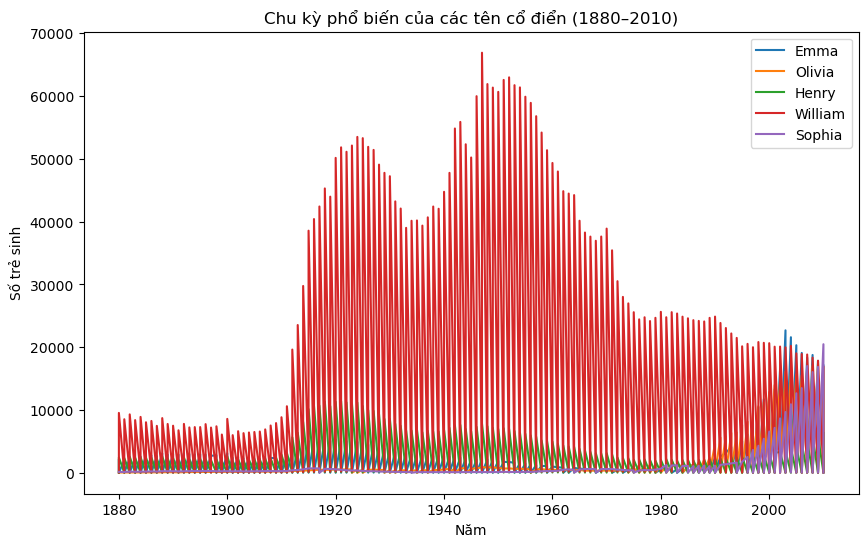

In [40]:
# Chọn vài tên cổ điển có "chu kỳ quay lại"
vintage_names = ['Emma', 'Olivia', 'Henry', 'William', 'Sophia']

subset = names[names['name'].isin(vintage_names)]
subset = subset.groupby(['year', 'sex', 'name'])['births'].sum().reset_index()

plt.figure(figsize=(10,6))
for n in vintage_names:
    temp = subset[subset['name'] == n]
    plt.plot(temp['year'], temp['births'], label=n)

plt.title('Chu kỳ phổ biến của các tên cổ điển (1880–2010)')
plt.xlabel('Năm')
plt.ylabel('Số trẻ sinh')
plt.legend()
plt.show()


# slide 2.2


In [41]:
# Tổng số births cho mỗi tên theo giới
name_ratio = (names.pivot_table('births', index='name', columns='sex', aggfunc='sum')
              .fillna(0))

# Tính tỉ lệ cân bằng giới (tên nào gần 0.5 là trung tính)
name_ratio['ratio'] = name_ratio.min(axis=1) / name_ratio.max(axis=1)


In [42]:
neutral_names = name_ratio[name_ratio['ratio'] > 0.3]
neutral_names = neutral_names.sort_values('ratio', ascending=False)
display(neutral_names.head(10))


sex,F,M,ratio
name,,,
Aaris,16.0,16.0,1.0
Verlynn,5.0,5.0,1.0
Vanness,5.0,5.0,1.0
Doney,5.0,5.0,1.0
Ebby,5.0,5.0,1.0
Vero,5.0,5.0,1.0
Dominquie,5.0,5.0,1.0
Elyah,5.0,5.0,1.0
Everal,5.0,5.0,1.0


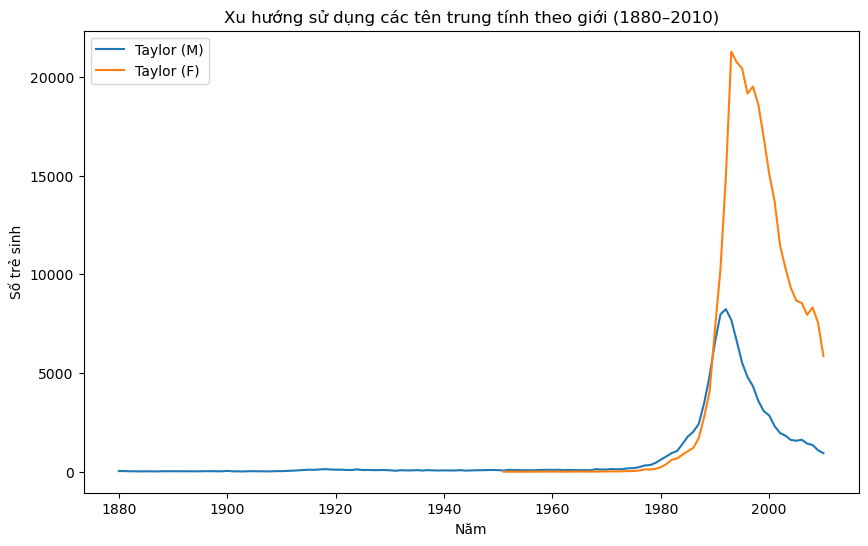

In [43]:
neutral_sample = ['Taylor']

subset = names[names['name'].isin(neutral_sample)]
subset = subset.groupby(['year', 'sex', 'name'])['births'].sum().reset_index()

plt.figure(figsize=(10,6))
for n in neutral_sample:
    for s in ['M', 'F']:
        temp = subset[(subset['name'] == n) & (subset['sex'] == s)]
        plt.plot(temp['year'], temp['births'], label=f"{n} ({s})")

plt.title('Xu hướng sử dụng các tên trung tính theo giới (1880–2010)')
plt.xlabel('Năm')
plt.ylabel('Số trẻ sinh')
plt.legend()
plt.show()
